In [1]:
import numpy as nm
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn

In [2]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
bit=pd.read_csv("Bitcoin_latest.csv")

In [4]:
bit.head()

,Unnamed: 0,Date,Price
0,0,2020-02-02,9344.37
1,1,2020-02-01,9392.88
2,2,2020-01-31,9350.53
3,3,2020-01-30,9508.99
4,4,2020-01-29,9316.63


In [5]:
bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 3 columns):
Unnamed: 0    367 non-null int64
Date          367 non-null object
Price         367 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [6]:
bit.isnull().sum()

Unnamed: 0    0
Date          0
Price         0
dtype: int64

In [7]:
bit.shape

(367, 3)

In [8]:
bit.dtypes

Unnamed: 0      int64
Date           object
Price         float64
dtype: object

In [9]:
bit['Date']=pd.to_datetime(bit['Date'])

In [10]:
bit.dtypes

Unnamed: 0             int64
Date          datetime64[ns]
Price                float64
dtype: object

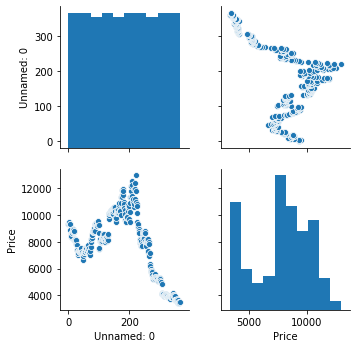

In [11]:
sns.pairplot(bit)

In [12]:
bit=bit.set_index(bit['Date'])

In [13]:
bit.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

In [14]:
bit.head()

,Price
Date,
2020-02-02,9344.37
2020-02-01,9392.88
2020-01-31,9350.53
2020-01-30,9508.99
2020-01-29,9316.63


In [15]:
bit.sort_values('Date',axis=0,ascending=True,inplace=True)

<Figure size 360x432 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Price')

Text(0.5, 1.0, 'Original')

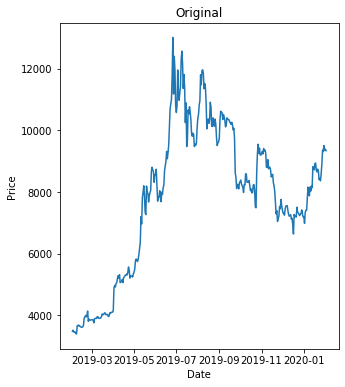

In [16]:
import matplotlib.pyplot as plt 

#plotting orginal values 
plt.figure(figsize=(5,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Original')
plt.plot(bit)

In [17]:
#mean and std of data with a window of 30 days
roll_mean=bit.rolling(window=30).mean()
roll_std=bit.rolling(window=30).std()

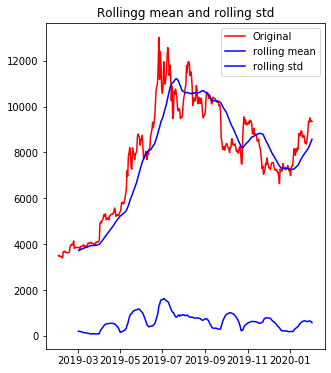

In [18]:
plt.figure(figsize=(5,6))
plt.plot(bit,color='Red',label='Original')
plt.plot(roll_mean,color='Blue',label='rolling mean')
plt.plot(roll_std,color='Blue',label='rolling std')
plt.title('Rollingg mean and rolling std')
plt.legend(loc='best')
plt.show();

In [19]:
#time series is not stationary 

#DF Test to check the stationarity 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas import Series

In [20]:
print("Dickey test")
df=adfuller(bit['Price'],autolag='AIC')
df_out=pd.Series(df[0:4],index=['Test statistics','p-values','lags used','number of obsevations used'])
for key,value in df[4].items():
    df_out['critical value (%s)'%key]=value
print(df_out)

Dickey test
Test statistics                -1.840023
p-values                        0.360780
lags used                       0.000000
number of obsevations used    366.000000
critical value (1%)            -3.448344
critical value (5%)            -2.869469
critical value (10%)           -2.570994
dtype: float64


In [21]:
#test statistics is less than critical values
# P value should be low to reject null hypothesis
#changing values using log function to make the data stationary 
bit_log=nm.log(bit['Price'])
bit_log.head()

Date
2019-02-01    8.157069
2019-02-02    8.166517
2019-02-03    8.150182
2019-02-04    8.148778
2019-02-05    8.150860
Name: Price, dtype: float64

<Figure size 360x432 with 0 Axes>

Text(0.5, 1.0, 'log original')

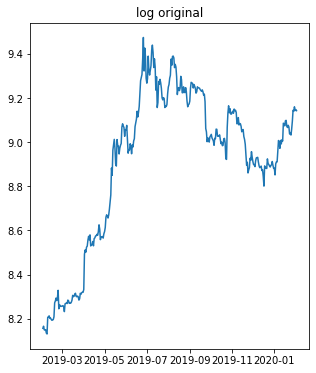

In [22]:
plt.figure(figsize=(5,6))
plt.title('log original')
plt.plot(bit_log)

In [23]:
rolling_mean_log=bit_log.rolling(window=30).mean()
rolling_std_log=bit_log.rolling(window=30).std()

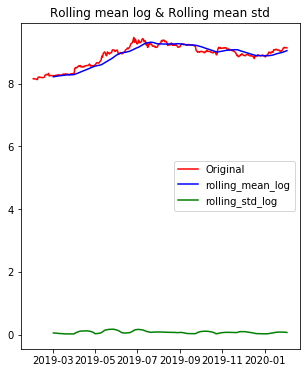

In [24]:
#plot 2
plt.figure(figsize=(5,6))
plt.plot(bit_log,color='red',label='Original')
plt.plot(rolling_mean_log,color='blue',label='rolling_mean_log')
plt.plot(rolling_std_log,color='green',label='rolling_std_log')
plt.title('Rolling mean log & Rolling mean std')
plt.legend(loc='best')
plt.show();

In [25]:
def stationarity_test(timeseries):
    
    movingAverage=timeseries.rolling(window=30).mean()
    movingSTD=timeseries.rolling(window=30).std()
    
    plt.figure(figsize=(10,5))
    
    orig=plt.plot(timeseries,color='red',label='Original')
    mean=plt.plot(movingAverage,color='blue',label='Rolling Mean')
    std=plt.plot(movingSTD,color='green',label='Rolling Std')
    
    plt.legend(loc='best')
    plt.title("Rolling Mean & Rolling Std")
    plt.show(block=False)
    
    print("Results of Dickey Fuller test")
    dftest=adfuller(timeseries['Price'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','#lags used','Number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Criticial Value(%s)'%key]=value
    print(dfoutput)

In [26]:
bit_moving_average=bit_log-rolling_mean_log
bit_moving_average.dropna(axis=0,inplace=True)
bit_moving_average=pd.DataFrame(bit_moving_average)
bit_moving_average.head()

,Price
Date,
2019-03-02,0.038959
2019-03-03,0.031221
2019-03-04,0.006512
2019-03-05,0.037805
2019-03-06,0.035711


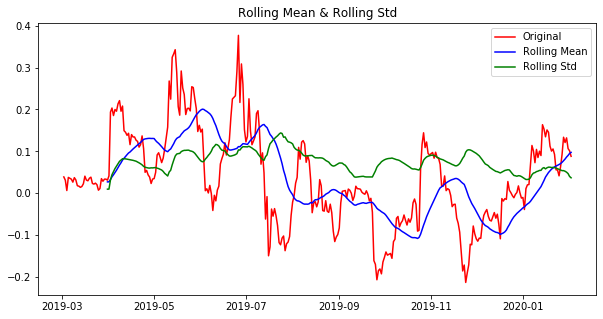

Results of Dickey Fuller test
Test Statistics                 -2.935859
p-value                          0.041334
#lags used                       0.000000
Number of Observations used    337.000000
Criticial Value(1%)             -3.449904
Criticial Value(5%)             -2.870155
Criticial Value(10%)            -2.571360
dtype: float64


In [27]:
stationarity_test(bit_moving_average)

In [28]:
#p values had been reduced to reject null hypothesis
#Test statistics and critical values are closer to consider the data is stationary
edwa=bit_log.ewm(halflife=30,min_periods=0,adjust=True).mean()
edwa

Date
2019-02-01    8.157069
2019-02-02    8.161848
2019-02-03    8.157869
2019-02-04    8.155517
2019-02-05    8.154542
                ...   
2020-01-29    9.004020
2020-01-30    9.007583
2020-01-31    9.010681
2020-02-01    9.013812
2020-02-02    9.016752
Name: Price, Length: 367, dtype: float64

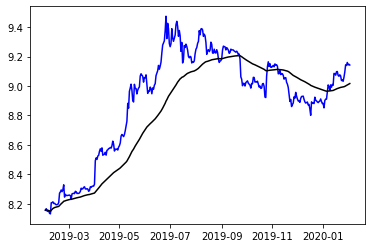

In [29]:
plt.plot(bit_log,color='blue')
plt.plot(edwa,color='black');

In [41]:
bit_log_edwa=bit_log-edwa
bit_log_edwa=pd.DataFrame(bit_log_edwa)
bit_log_edwa.head()

,Price
Date,
2019-02-01,0.000000
2019-02-02,0.004669
2019-02-03,-0.007687
2019-02-04,-0.006739
2019-02-05,-0.003682


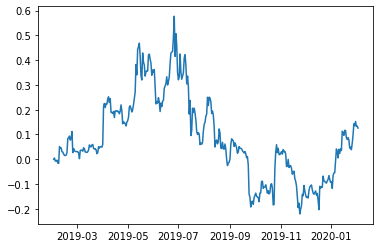

In [42]:
plt.plot(bit_log_edwa)

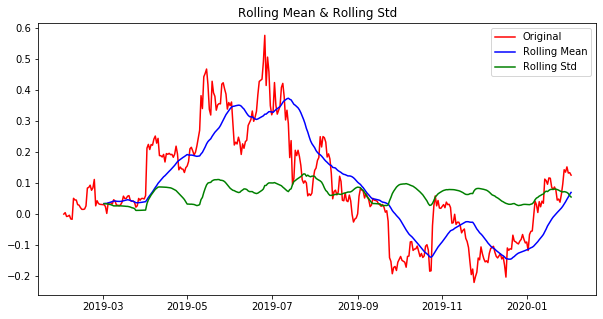

Results of Dickey Fuller test
Test Statistics                 -2.023121
p-value                          0.276528
#lags used                       0.000000
Number of Observations used    366.000000
Criticial Value(1%)             -3.448344
Criticial Value(5%)             -2.869469
Criticial Value(10%)            -2.570994
dtype: float64


In [45]:
stationarity_test(bit_log_edwa)

In [31]:
shift=bit_log-bit_log.shift()
shift.dropna(axis=0,inplace=True)
shift=pd.DataFrame(shift)
shift

,Price
Date,
2019-02-02,0.009448
2019-02-03,-0.016335
2019-02-04,-0.001404
2019-02-05,0.002082
2019-02-06,-0.015288
...,...
2020-01-29,-0.004494
2020-01-30,0.020437
2020-01-31,-0.016805


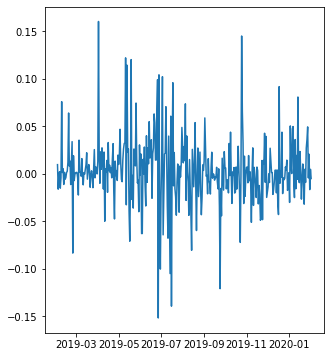

In [32]:
plt.figure(figsize=(5,6))
plt.plot(shift,label='Shift')
plt.show();

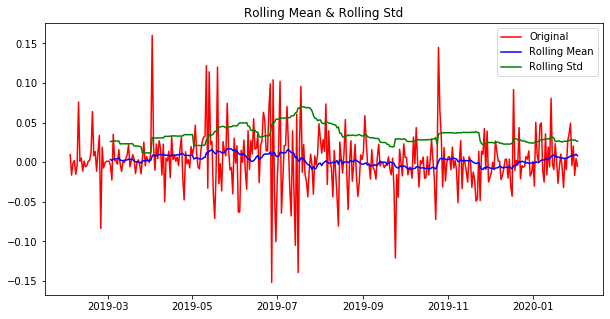

Results of Dickey Fuller test
Test Statistics                -19.607117
p-value                          0.000000
#lags used                       0.000000
Number of Observations used    365.000000
Criticial Value(1%)             -3.448394
Criticial Value(5%)             -2.869491
Criticial Value(10%)            -2.571006
dtype: float64


In [33]:
stationarity_test(shift)

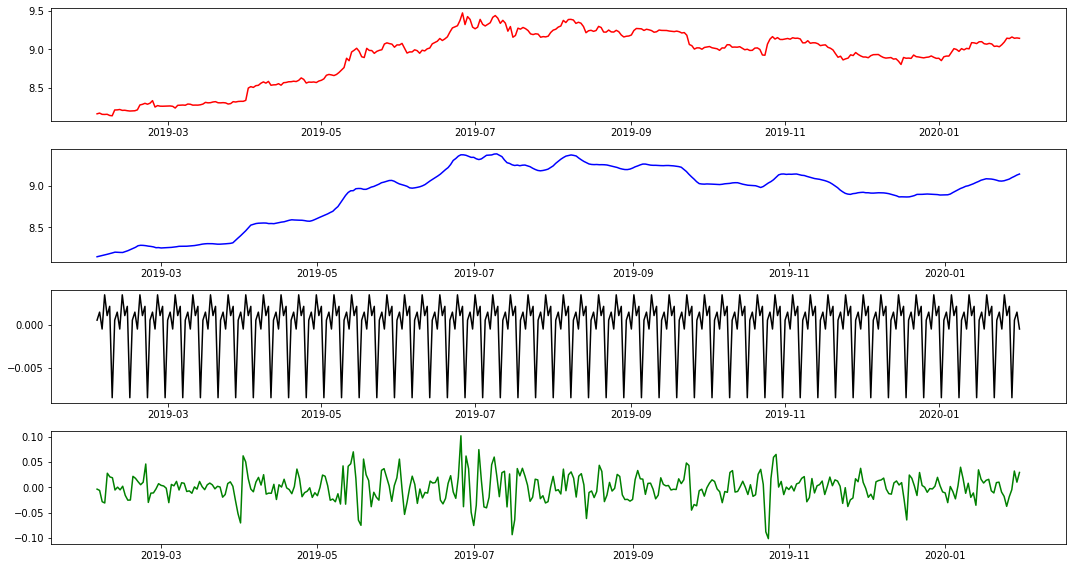

In [34]:
#dataset is stationary 
#ARIMA MODEL
from statsmodels.tsa.seasonal import seasonal_decompose

decompose=seasonal_decompose(bit_log)

trend=decompose.trend
seasonal=decompose.seasonal
#residuals in time series are what is remaining after fitting the model.
residuals=decompose.resid

plt.figure(figsize=(15,8))

plt.subplot(411)
plt.plot(bit_log,color='red',label='log_orginal')

plt.subplot(412)
plt.plot(trend,color='blue',label='trend')

plt.subplot(413)
plt.plot(seasonal,color='black',label='seasonal')

plt.subplot(414)
plt.plot(residuals,color='green',label='residual')

plt.tight_layout()
plt.show();


In [35]:
residuals.dropna(axis=0,inplace=True)
residuals

Date
2019-02-04   -0.003391
2019-02-05   -0.006021
2019-02-06   -0.028355
2019-02-07   -0.030888
2019-02-08    0.028113
                ...   
2020-01-26   -0.018674
2020-01-27   -0.004522
2020-01-28    0.032505
2020-01-29    0.010423
2020-01-30    0.029648
Name: Price, Length: 361, dtype: float64

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

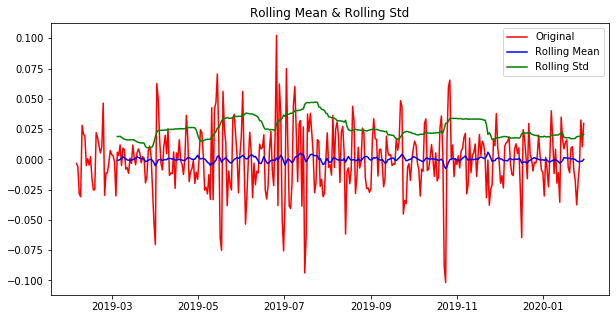

Results of Dickey Fuller test
Test Statistics               -8.485100e+00
p-value                        1.360022e-13
#lags used                     1.200000e+01
Number of Observations used    3.480000e+02
Criticial Value(1%)           -3.449282e+00
Criticial Value(5%)           -2.869881e+00
Criticial Value(10%)          -2.571214e+00
dtype: float64


In [36]:
plt.figure(figsize=(10,8))
residuals=pd.DataFrame(residuals)
stationarity_test(residuals)

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

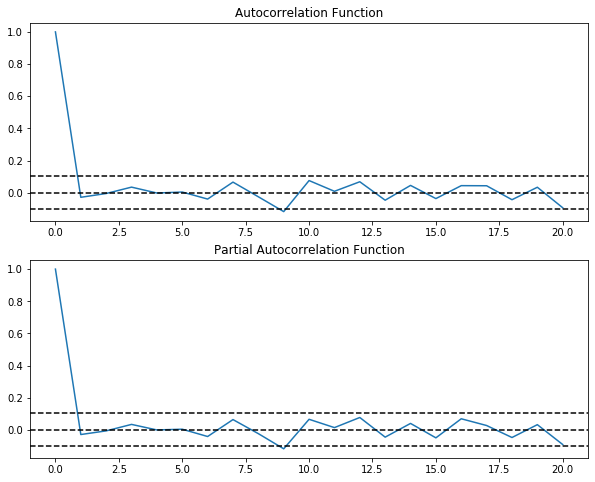

In [37]:
#acf and pacf test to get p and q values

lag_acf = acf(shift,nlags=20)
lag_pacf = pacf(shift,nlags=20,method='ols')

plt.figure(figsize=(10,8))

#plot ACF
plt.subplot(211)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/nm.sqrt(len(shift)),linestyle='--',color='black')
plt.axhline(y=1.96/nm.sqrt(len(shift)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

plt.subplot(212)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/nm.sqrt(len(shift)),linestyle='--',color='black')
plt.axhline(y=1.96/nm.sqrt(len(shift)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')

In [66]:
#The points crosses the first time on ACF and PACF is 1.ie, p(PACF)=1,q(ACF)=1
#AR model
model=ARIMA(bit_log,order=(1,1,0))
results_AR=model.fit(disp=-1)
results_AR

Text(0.5, 1.0, 'RSS (total squared residuals):0.4571')

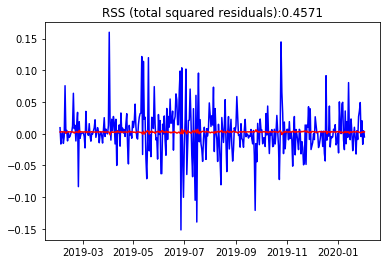

In [68]:
plt.plot(shift,color='blue')
plt.plot(results_AR.fittedvalues,color='red')

plt.title('RSS (total squared residuals):%.4f'%sum((results_AR.fittedvalues-shift['Price'])**2))

Text(0.5, 1.0, 'RSS (total squared residuals):0.4571')

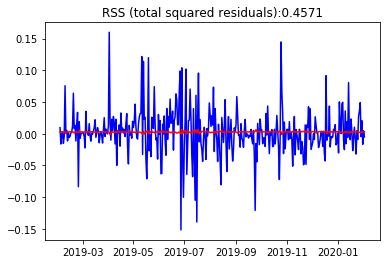

In [69]:
#MA model
model=ARIMA(bit_log,order=(0,1,1))
results_MA=model.fit(disp=-1)
plt.plot(shift,color='blue')
plt.plot(results_MA.fittedvalues,color='red')

plt.title('RSS (total squared residuals):%.4f'%sum((results_MA.fittedvalues-shift['Price'])**2))

Text(0.5, 1.0, 'RSS (total squared residuals):0.4571')

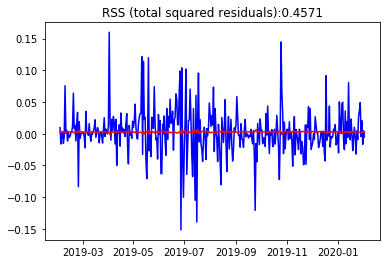

In [70]:
#ARIMA model
model=ARIMA(bit_log,order=(1,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(shift,color='blue')
plt.plot(results_ARIMA.fittedvalues,color='red')

plt.title('RSS (total squared residuals):%.4f'%sum((results_ARIMA.fittedvalues-shift['Price'])**2))

In [71]:
size=int(len(bit_log)-100)
# Divide into train and test
train_arima,test_arima =bit_log[0:size],bit_log[size:len(bit_log)]

In [80]:
records=[x for x in train_arima] 
prediction=list()
error_list=list()
original=list()

for i in range (len(test_arima)):
    model=ARIMA(records,order=(1,1,0))
    model_fit=model.fit(disp=-1)
    out=model_fit.forecast()
    predict=out[0]
    real_value=test_arima[i]
    records.append(real_value)
    
    predict=nm.exp(predict)
    real_value=nm.exp(real_value)
    error=((abs(predict-real_value))/real_value)*100
    error_list.append(error)
    print('predicted =%f,expected=%f,error=%f'%(predict,real_value,error),'%')
    prediction.append(float(predict))
    original.append(float(real_value))
print("\n mean error:%f"%(sum(error_list)/float(len(error_list))),'%')    

predicted =8626.614697,expected=9244.970000,error=6.688559 %
predicted =9263.430263,expected=9551.710000,error=3.018096 %
predicted =9581.577447,expected=9256.150000,error=3.515797 %
predicted =9297.798013,expected=9427.690000,error=1.377771 %
predicted =9458.883199,expected=9205.730000,error=2.749952 %
predicted =9245.546310,expected=9199.580000,error=0.499657 %
predicted =9233.470419,expected=9261.100000,error=0.298340 %
predicted =9293.519616,expected=9324.720000,error=0.334599 %
predicted =9357.432842,expected=9235.350000,error=1.321908 %
predicted =9271.350405,expected=9412.610000,error=1.500748 %
predicted =9442.576307,expected=9342.530000,error=1.070870 %
predicted =9378.659986,expected=9360.880000,error=0.189939 %
predicted =9394.585581,expected=9267.560000,error=1.370648 %
predicted =9303.518506,expected=8804.880000,error=5.663206 %
predicted =8846.345246,expected=8813.580000,error=0.371759 %
predicted =8843.209256,expected=9055.530000,error=2.344653 %
predicted =9080.798374,e

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Expected Vs Predicted Views Forecasting')

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Closing Price')

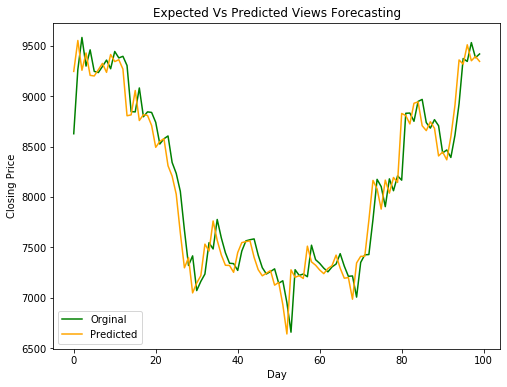

In [82]:
plt.figure(figsize=(8, 6))
test_day=[t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day,prediction,color= 'green')
plt.plot(test_day,original,color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend(labels)
plt.show()